# 4. Datenverständnis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

### 4.1. Daten importieren und einen Überblick erhalten

In [18]:
data = pd.read_csv(
    'aggrigated_data.csv',
    #index_col=0
    )
data

,BFS-Nr,Gemeindename,GeoLocation,Ladestationen,EV_Bestand_2010,EV_Bestand_2011,EV_Bestand_2012,EV_Bestand_2013,EV_Bestand_2014,EV_Bestand_2015,EV_Bestand_2016,EV_Bestand_2017,EV_Bestand_2018,EV_Bestand_2019,EV_Bestand_2020,EV_Bestand_2021,Strassenlänge(km),Anz_Einwohner,Einwohner_Veränderung_2010-2019,Bevölkerungsdichte_pro_km2,Ausländeranteil,Altersverteilung_0-19,Altersverteilung_20-64,Altersverteilung_65+,Rohe_Heiratsziffer,Rohe_Scheidungsziffer,Rohe_Geburtenziffer,Rohe_Sterbeziffer,Anz_Privathaushalte,Durchschn_Haushaltsgrösse,Gesamtfläche(km2),Siedlungsfläche,Siedlungsfläche_Veränderung(ha),Landwirtschaftsfläche,Landwirschaftsfläche_Veränderung(ha),Wald&Gehölze,Unproduktive_Fläche,Beschäftigte_total,Beschäftigte_1_Sektor,Beschäftigte_2_Sektor,Beschäftigte_3_Sektor,Arbeitsstätte_total,Arbeitsstätten_1_Sektor,Arbeitsstätten_2_Sektor,Arbeitsstätten_3_Sektor,Leerwohnungsziffer,Neu_gebaute_Wohnungen(pro_1000_Einwohner),Sozialhilfequote,Wahlanteil_FDP,Wahlanteil_CVP,Wahlanteil_SP,Wahlanteil_SVP,Wahlanteil_EVP,Wahlanteil_GLP,Wahlanteil_BDP,Wahlanteil_PdA/Sol.,Wahlanteil_GPS,Wahlanteil_kleine_Rechtsparteien,CO2-Gesetz_Ja-Anteil,CO2-Gesetz_Stimmbeteiligung
0,1,Aeugst am Albis,"MULTIPOLYGON (((8.503885 47.273077, 8.503439 4...",1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0,7.0,8.0,13.0,27.0,39.0,26.516156,1981.0,8.607456,250.442478,14.184755,19.787986,62.190813,18.021201,7.065355,2.018673,9.084027,6.560686,848.0,2.324292,7.91,12.658228,21.0,51.139241,-22.0,30.886076,5.316456,442,39,25,378,141,15,16,110,5.291577,13.910355,1.01,16.4210448751,2.4979736202,11.5651020559,30.3809593987,3.2274703412,14.3172942303,1.2637241176,0.1621103824,15.0504752782,3.8206469678,53.189401,72.073343
1,2,Affoltern am Albis,"MULTIPOLYGON (((8.414662 47.293601, 8.414956 4...",24.0,0.0,0.0,0.0,1.0,6.0,8.0,16.0,29.0,35.0,54.0,75.0,103.0,66.711839,12303.0,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,1.793576,12.881135,9.212457,5412.0,2.225979,10.59,30.674264,92.0,40.170940,-93.0,28.205128,0.949668,6920,47,1307,5566,995,23,134,838,1.005548,3.787255,3.02,13.3854374655,4.5353414342,14.6452545306,30.3069199612,6.6185559169,12.6666286345,2.0014452241,0.1987183144,12.5905642079,1.5555175233,51.250000,58.204808
2,3,Bonstetten,"MULTIPOLYGON (((8.441322 47.315828, 8.441319 4...",4.0,1.0,1.0,2.0,2.0,7.0,10.0,15.0,18.0,21.0,29.0,37.0,70.0,31.501571,5572.0,8.005427,749.932705,16.564968,23.636037,59.834889,16.529074,4.316547,1.798561,9.892086,4.316547,2327.0,2.384186,7.43,15.456989,24.0,55.510753,-21.0,28.629032,0.403226,1014,34,111,869,281,14,26,241,1.171717,0.181422,1.51,15.3549839136,3.8679612771,16.742890944,26.1163129572,4.1940184381,16.2379351637,1.2840304128,0.1760131577,12.3685311558,1.3850215688,55.077960,65.184175
3,4,Hausen am Albis,"MULTIPOLYGON (((8.574374000000001 47.217067, 8...",0.0,1.0,1.0,1.0,2.0,8.0,11.0,12.0,16.0,21.0,25.0,32.0,45.0,42.495957,3751.0,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,1.610306,8.588298,3.757381,1552.0,2.400773,13.60,12.692590,33.0,55.906090,-31.0,28.833456,2.567865,1021,93,136,792,271,36,38,197,0.630011,3.002183,1.19,11.1351626663,3.9345514739,13.7115086692,33.1847796099,4.0597610407,12.4169690796,1.6107468008,0.1931198404,16.7441268224,1.6107468008,50.000000,68.894099
4,5,Hedingen,"MULTIPOLYGON (((8.436213 47.315196, 8.436321 4...",0.0,0.0,0.0,0.0,0.0,1.0,9.0,10.0,14.0,22.0,31.0,45.0,56.0,33.142703,3778.0,10.791789,578.560490,16.410799,21.625199,61.646374,16.728428,3.727370,2.129925,7.454739,6.389776,1580.0,2.378481,6.53,19.817073,44.0,46.341463,-43.0,33.231707,0.609756,1478,29,679,770,201,11,26,164,0.962696,3.248511,1.47,13.9908978419,3.8736603679,16.7383234412,26.6017910698,3.7268513664,16.4153436379,1.8812524905,0.1824626161,12.3487342967,2.1706759506,54.629097,69.401506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [19]:
data.columns

Index(['BFS-Nr', 'Gemeindename', 'GeoLocation', 'Ladestationen',
       'EV_Bestand_2010', 'EV_Bestand_2011', 'EV_Bestand_2012',
       'EV_Bestand_2013', 'EV_Bestand_2014', 'EV_Bestand_2015',
       'EV_Bestand_2016', 'EV_Bestand_2017', 'EV_Bestand_2018',
       'EV_Bestand_2019', 'EV_Bestand_2020', 'EV_Bestand_2021',
       'Strassenlänge(km)', 'Anz_Einwohner', 'Einwohner_Veränderung_2010-2019',
       'Bevölkerungsdichte_pro_km2', 'Ausländeranteil',
       'Altersverteilung_0-19', 'Altersverteilung_20-64',
       'Altersverteilung_65+', 'Rohe_Heiratsziffer', 'Rohe_Scheidungsziffer',
       'Rohe_Geburtenziffer', 'Rohe_Sterbeziffer', 'Anz_Privathaushalte',
       'Durchschn_Haushaltsgrösse', 'Gesamtfläche(km2)', 'Siedlungsfläche',
       'Siedlungsfläche_Veränderung(ha)', 'Landwirtschaftsfläche',
       'Landwirschaftsfläche_Veränderung(ha)', 'Wald&Gehölze',
       'Unproduktive_Fläche', 'Beschäftigte_total', 'Beschäftigte_1_Sektor',
       'Beschäftigte_2_Sektor', 'Beschäftigte_3_Se

## 4.2. Datenbereinigung

Nicht alle Spalten sind relevant für unseren Case (z.B. Parteienstärke), andere sind redundant, da sie keine neue Informationen beinhalten (z.B. Beschäftigte Total). Dies könnte zum Problem der Kollinearität führen, würde man diese nicht herausnehmen.

In [20]:
column_drop = [
    'Gemeindename',
    'GeoLocation',
    'Ausländeranteil',
    'Altersverteilung_65+',
    'Rohe_Heiratsziffer',
    'Rohe_Scheidungsziffer',
    'Unproduktive_Fläche',
    'Beschäftigte_total',
    'Arbeitsstätte_total',
    'Wahlanteil_FDP',
    'Wahlanteil_CVP',
    'Wahlanteil_SP',
    'Wahlanteil_SVP',
    'Wahlanteil_EVP',
    'Wahlanteil_GLP',
    'Wahlanteil_BDP',
    'Wahlanteil_PdA/Sol.',
    'Wahlanteil_GPS',
    'Wahlanteil_kleine_Rechtsparteien',    
]

data.drop(column_drop, axis=1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   BFS-Nr                                     2147 non-null   int64  
 1   Ladestationen                              2147 non-null   float64
 2   EV_Bestand_2010                            2147 non-null   float64
 3   EV_Bestand_2011                            2147 non-null   float64
 4   EV_Bestand_2012                            2147 non-null   float64
 5   EV_Bestand_2013                            2147 non-null   float64
 6   EV_Bestand_2014                            2147 non-null   float64
 7   EV_Bestand_2015                            2147 non-null   float64
 8   EV_Bestand_2016                            2147 non-null   float64
 9   EV_Bestand_2017                            2147 non-null   float64
 10  EV_Bestand_2018         

In [22]:
data[data['Sozialhilfequote'] == 'X']

,BFS-Nr,Ladestationen,EV_Bestand_2010,EV_Bestand_2011,EV_Bestand_2012,EV_Bestand_2013,EV_Bestand_2014,EV_Bestand_2015,EV_Bestand_2016,EV_Bestand_2017,EV_Bestand_2018,EV_Bestand_2019,EV_Bestand_2020,EV_Bestand_2021,Strassenlänge(km),Anz_Einwohner,Einwohner_Veränderung_2010-2019,Bevölkerungsdichte_pro_km2,Altersverteilung_0-19,Altersverteilung_20-64,Rohe_Geburtenziffer,Rohe_Sterbeziffer,Anz_Privathaushalte,Durchschn_Haushaltsgrösse,Gesamtfläche(km2),Siedlungsfläche,Siedlungsfläche_Veränderung(ha),Landwirtschaftsfläche,Landwirschaftsfläche_Veränderung(ha),Wald&Gehölze,Beschäftigte_1_Sektor,Beschäftigte_2_Sektor,Beschäftigte_3_Sektor,Arbeitsstätten_1_Sektor,Arbeitsstätten_2_Sektor,Arbeitsstätten_3_Sektor,Leerwohnungsziffer,Neu_gebaute_Wohnungen(pro_1000_Einwohner),Sozialhilfequote,CO2-Gesetz_Ja-Anteil,CO2-Gesetz_Stimmbeteiligung
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,9.0,12.747088,645.0,4.707792,137.526652,22.015504,59.534884,6.149116,7.686395,274.0,2.354015,4.69,8.974359,-5.0,59.615385,0.0,23.717949,49,49,77,18,7,42,2.990033,0.000000,X,44.444444,74.501109
14,21,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,4.0,6.0,11.0,21.492708,698.0,20.970537,106.079027,21.203438,60.028653,9.964413,2.846975,274.0,2.485401,6.58,10.876133,10.0,63.897281,-12.0,22.658610,49,24,76,22,6,37,0.338983,21.052632,X,29.411765,79.352227
17,24,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,5.0,5.0,7.0,11.0,23.0,26.454313,979.0,12.788018,95.886386,24.616956,60.061287,7.157464,5.112474,387.0,2.519380,10.21,6.889764,9.0,55.118110,-8.0,37.992126,72,38,90,24,7,43,1.190476,3.089598,X,39.622642,73.553719
19,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,7.0,17.519657,658.0,4.113924,118.345324,21.580547,61.702128,7.598784,10.638298,258.0,2.538760,5.56,12.454874,52.0,46.389892,-53.0,40.974729,27,19,83,11,7,33,2.068966,0.000000,X,32.000000,72.857143
21,28,0.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,6.0,8.0,10.0,13.0,22.0,34.667357,1420.0,15.729421,139.626352,21.197183,61.619718,10.585745,8.468596,592.0,2.378378,10.17,8.333333,10.0,50.882353,-15.0,33.725490,153,146,510,27,24,87,4.223228,5.035971,X,37.481698,72.182006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,6783,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,15.482649,303.0,-0.980392,48.949919,21.122112,60.726073,3.350084,10.050251,121.0,2.504132,6.19,7.532051,11.0,29.967949,4.0,59.935897,25,114,40,7,7,16,6.622517,3.412969,X,22.839506,69.456067
2136,6787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.340286,179.0,6.547619,31.569665,20.670391,49.720670,11.267606,5.633803,78.0,2.294872,5.67,5.123675,11.0,62.367491,-6.0,31.448763,19,X,17,6,X,12,4.255319,5.434783,X,33.628319,73.717949
2137,6789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,17.376675,349.0,-1.412429,44.858612,16.045845,54.727794,5.722461,14.306152,157.0,2.197452,7.78,8.634021,16.0,53.092784,-5.0,25.386598,30,24,66,13,9,19,1.834862,5.540166,X,24.644550,72.297297
2139,6792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,19.556119,388.0,7.182320,43.255295,21.907216,55.927835,5.108557,7.662835,154.0,2.500000,8.97,6.703911,18.0,64.692737,4.0,28.379888,37,27,30,14,5,14,2.403846,7.731959,X,27.830189,63.988095


Einige der obrigen Spalten sind noch in der Form von Objects. Näheres Untersuchen hat ergeben, dass in gewissen Spalten der Wert 'X' vorkommt. Laut Bundesamt konnten dort die Daten nicht erhoben werden.

Diese werden nun imputiert:

In [23]:
columns_to_nan = ['Beschäftigte_1_Sektor', 'Beschäftigte_2_Sektor', 'Beschäftigte_3_Sektor','Arbeitsstätten_1_Sektor', 'Arbeitsstätten_2_Sektor', 'Arbeitsstätten_3_Sektor', 'Sozialhilfequote']
for c in columns_to_nan:
    data.loc[data[c] == 'X',c] = np.nan
data[data.isna().any(axis=1)]

,BFS-Nr,Ladestationen,EV_Bestand_2010,EV_Bestand_2011,EV_Bestand_2012,EV_Bestand_2013,EV_Bestand_2014,EV_Bestand_2015,EV_Bestand_2016,EV_Bestand_2017,EV_Bestand_2018,EV_Bestand_2019,EV_Bestand_2020,EV_Bestand_2021,Strassenlänge(km),Anz_Einwohner,Einwohner_Veränderung_2010-2019,Bevölkerungsdichte_pro_km2,Altersverteilung_0-19,Altersverteilung_20-64,Rohe_Geburtenziffer,Rohe_Sterbeziffer,Anz_Privathaushalte,Durchschn_Haushaltsgrösse,Gesamtfläche(km2),Siedlungsfläche,Siedlungsfläche_Veränderung(ha),Landwirtschaftsfläche,Landwirschaftsfläche_Veränderung(ha),Wald&Gehölze,Beschäftigte_1_Sektor,Beschäftigte_2_Sektor,Beschäftigte_3_Sektor,Arbeitsstätten_1_Sektor,Arbeitsstätten_2_Sektor,Arbeitsstätten_3_Sektor,Leerwohnungsziffer,Neu_gebaute_Wohnungen(pro_1000_Einwohner),Sozialhilfequote,CO2-Gesetz_Ja-Anteil,CO2-Gesetz_Stimmbeteiligung
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,9.0,12.747088,645.0,4.707792,137.526652,22.015504,59.534884,6.149116,7.686395,274.0,2.354015,4.69,8.974359,-5.0,59.615385,0.0,23.717949,49,49,77,18,7,42,2.990033,0.000000,NaN,44.444444,74.501109
14,21,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,4.0,6.0,11.0,21.492708,698.0,20.970537,106.079027,21.203438,60.028653,9.964413,2.846975,274.0,2.485401,6.58,10.876133,10.0,63.897281,-12.0,22.658610,49,24,76,22,6,37,0.338983,21.052632,NaN,29.411765,79.352227
17,24,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,5.0,5.0,7.0,11.0,23.0,26.454313,979.0,12.788018,95.886386,24.616956,60.061287,7.157464,5.112474,387.0,2.519380,10.21,6.889764,9.0,55.118110,-8.0,37.992126,72,38,90,24,7,43,1.190476,3.089598,NaN,39.622642,73.553719
19,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,7.0,17.519657,658.0,4.113924,118.345324,21.580547,61.702128,7.598784,10.638298,258.0,2.538760,5.56,12.454874,52.0,46.389892,-53.0,40.974729,27,19,83,11,7,33,2.068966,0.000000,NaN,32.000000,72.857143
20,27,4.0,0.0,0.0,1.0,1.0,6.0,9.0,9.0,10.0,15.0,16.0,22.0,32.0,22.097892,3614.0,3.553009,1457.258065,20.226895,62.091865,12.712450,7.185298,1626.0,2.190652,2.48,42.800000,14.0,11.200000,-16.0,44.000000,5,277,883,NaN,33,161,2.267699,4.669047,2.57,48.618372,59.251197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,6783,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,15.482649,303.0,-0.980392,48.949919,21.122112,60.726073,3.350084,10.050251,121.0,2.504132,6.19,7.532051,11.0,29.967949,4.0,59.935897,25,114,40,7,7,16,6.622517,3.412969,NaN,22.839506,69.456067
2136,6787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.340286,179.0,6.547619,31.569665,20.670391,49.720670,11.267606,5.633803,78.0,2.294872,5.67,5.123675,11.0,62.367491,-6.0,31.448763,19,NaN,17,6,NaN,12,4.255319,5.434783,NaN,33.628319,73.717949
2137,6789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,17.376675,349.0,-1.412429,44.858612,16.045845,54.727794,5.722461,14.306152,157.0,2.197452,7.78,8.634021,16.0,53.092784,-5.0,25.386598,30,24,66,13,9,19,1.834862,5.540166,NaN,24.644550,72.297297
2139,6792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,19.556119,388.0,7.182320,43.255295,21.907216,55.927835,5.108557,7.662835,154.0,2.500000,8.97,6.703911,18.0,64.692737,4.0,28.379888,37,27,30,14,5,14,2.403846,7.731959,NaN,27.830189,63.988095


In [24]:
imputer = KNNImputer()
imputer.fit(data)
data_imputed = imputer.transform(data)

names = imputer.feature_names_in_

data_imputed = pd.DataFrame(data_imputed, columns=names)

In [25]:
data_imputed = data_imputed.astype(float)
data_imputed['BFS-Nr'] = data_imputed['BFS-Nr'].astype(int)
data_imputed.set_index('BFS-Nr', inplace=True)
data_imputed

,Ladestationen,EV_Bestand_2010,EV_Bestand_2011,EV_Bestand_2012,EV_Bestand_2013,EV_Bestand_2014,EV_Bestand_2015,EV_Bestand_2016,EV_Bestand_2017,EV_Bestand_2018,EV_Bestand_2019,EV_Bestand_2020,EV_Bestand_2021,Strassenlänge(km),Anz_Einwohner,Einwohner_Veränderung_2010-2019,Bevölkerungsdichte_pro_km2,Altersverteilung_0-19,Altersverteilung_20-64,Rohe_Geburtenziffer,Rohe_Sterbeziffer,Anz_Privathaushalte,Durchschn_Haushaltsgrösse,Gesamtfläche(km2),Siedlungsfläche,Siedlungsfläche_Veränderung(ha),Landwirtschaftsfläche,Landwirschaftsfläche_Veränderung(ha),Wald&Gehölze,Beschäftigte_1_Sektor,Beschäftigte_2_Sektor,Beschäftigte_3_Sektor,Arbeitsstätten_1_Sektor,Arbeitsstätten_2_Sektor,Arbeitsstätten_3_Sektor,Leerwohnungsziffer,Neu_gebaute_Wohnungen(pro_1000_Einwohner),Sozialhilfequote,CO2-Gesetz_Ja-Anteil,CO2-Gesetz_Stimmbeteiligung
BFS-Nr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0,7.0,8.0,13.0,27.0,39.0,26.516156,1981.0,8.607456,250.442478,19.787986,62.190813,9.084027,6.560686,848.0,2.324292,7.91,12.658228,21.0,51.139241,-22.0,30.886076,39.0,25.0,378.0,15.0,16.0,110.0,5.291577,13.910355,1.01,53.189401,72.073343
2,24.0,0.0,0.0,0.0,1.0,6.0,8.0,16.0,29.0,35.0,54.0,75.0,103.0,66.711839,12303.0,10.927779,1161.756374,20.165813,61.667886,12.881135,9.212457,5412.0,2.225979,10.59,30.674264,92.0,40.170940,-93.0,28.205128,47.0,1307.0,5566.0,23.0,134.0,838.0,1.005548,3.787255,3.02,51.250000,58.204808
3,4.0,1.0,1.0,2.0,2.0,7.0,10.0,15.0,18.0,21.0,29.0,37.0,70.0,31.501571,5572.0,8.005427,749.932705,23.636037,59.834889,9.892086,4.316547,2327.0,2.384186,7.43,15.456989,24.0,55.510753,-21.0,28.629032,34.0,111.0,869.0,14.0,26.0,241.0,1.171717,0.181422,1.51,55.077960,65.184175
4,0.0,1.0,1.0,1.0,2.0,8.0,11.0,12.0,16.0,21.0,25.0,32.0,45.0,42.495957,3751.0,11.636905,275.808824,22.180752,59.824047,8.588298,3.757381,1552.0,2.400773,13.60,12.692590,33.0,55.906090,-31.0,28.833456,93.0,136.0,792.0,36.0,38.0,197.0,0.630011,3.002183,1.19,50.000000,68.894099
5,0.0,0.0,0.0,0.0,0.0,1.0,9.0,10.0,14.0,22.0,31.0,45.0,56.0,33.142703,3778.0,10.791789,578.560490,21.625199,61.646374,7.454739,6.389776,1580.0,2.378481,6.53,19.817073,44.0,46.341463,-43.0,33.231707,29.0,679.0,770.0,11.0,26.0,164.0,0.962696,3.248511,1.47,54.629097,69.401506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,19.431732,559.0,1.821494,61.092896,18.425760,56.887299,16.378526,5.459509,238.0,2.315126,9.15,6.338798,14.0,55.846995,-13.0,37.595628,31.0,182.0,28.0,11.0,10.0,14.0,2.749141,0.000000,1.67,30.303030,61.663286
6807,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,5.0,9.0,46.657442,1238.0,-5.279265,53.732639,21.728595,52.988691,8.103728,15.397083,538.0,2.286245,23.04,7.391304,41.0,44.043478,-18.0,47.652174,149.0,186.0,139.0,34.0,19.0,43.0,2.155172,0.825083,2.11,32.206406,60.721868
6808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,9.0,101.283739,1263.0,0.158604,20.453441,18.289786,56.611243,12.553943,10.984700,585.0,2.104274,61.75,3.626356,43.0,42.884896,95.0,52.096487,205.0,91.0,349.0,69.0,28.0,66.0,2.422145,1.534919,2.10,45.625000,58.754513


In [26]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 1 to 6810
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Ladestationen                              2147 non-null   float64
 1   EV_Bestand_2010                            2147 non-null   float64
 2   EV_Bestand_2011                            2147 non-null   float64
 3   EV_Bestand_2012                            2147 non-null   float64
 4   EV_Bestand_2013                            2147 non-null   float64
 5   EV_Bestand_2014                            2147 non-null   float64
 6   EV_Bestand_2015                            2147 non-null   float64
 7   EV_Bestand_2016                            2147 non-null   float64
 8   EV_Bestand_2017                            2147 non-null   float64
 9   EV_Bestand_2018                            2147 non-null   float64
 10  EV_Bestand_2019         

In [27]:
data_imputed.isna().sum()

Ladestationen                                0
EV_Bestand_2010                              0
EV_Bestand_2011                              0
EV_Bestand_2012                              0
EV_Bestand_2013                              0
EV_Bestand_2014                              0
EV_Bestand_2015                              0
EV_Bestand_2016                              0
EV_Bestand_2017                              0
EV_Bestand_2018                              0
EV_Bestand_2019                              0
EV_Bestand_2020                              0
EV_Bestand_2021                              0
Strassenlänge(km)                            0
Anz_Einwohner                                0
Einwohner_Veränderung_2010-2019              0
Bevölkerungsdichte_pro_km2                   0
Altersverteilung_0-19                        0
Altersverteilung_20-64                       0
Rohe_Geburtenziffer                          0
Rohe_Sterbeziffer                            0
Anz_Privathau

Alle NaN-Werte konnten so gefüllt werden

In [28]:
pd.set_option('display.max_columns', None)
data_imputed.describe()

,Ladestationen,EV_Bestand_2010,EV_Bestand_2011,EV_Bestand_2012,EV_Bestand_2013,EV_Bestand_2014,EV_Bestand_2015,EV_Bestand_2016,EV_Bestand_2017,EV_Bestand_2018,EV_Bestand_2019,EV_Bestand_2020,EV_Bestand_2021,Strassenlänge(km),Anz_Einwohner,Einwohner_Veränderung_2010-2019,Bevölkerungsdichte_pro_km2,Altersverteilung_0-19,Altersverteilung_20-64,Rohe_Geburtenziffer,Rohe_Sterbeziffer,Anz_Privathaushalte,Durchschn_Haushaltsgrösse,Gesamtfläche(km2),Siedlungsfläche,Siedlungsfläche_Veränderung(ha),Landwirtschaftsfläche,Landwirschaftsfläche_Veränderung(ha),Wald&Gehölze,Beschäftigte_1_Sektor,Beschäftigte_2_Sektor,Beschäftigte_3_Sektor,Arbeitsstätten_1_Sektor,Arbeitsstätten_2_Sektor,Arbeitsstätten_3_Sektor,Leerwohnungsziffer,Neu_gebaute_Wohnungen(pro_1000_Einwohner),Sozialhilfequote,CO2-Gesetz_Ja-Anteil,CO2-Gesetz_Stimmbeteiligung
count,2147.000000,2147.000000,2147.00000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000
mean,4.259898,0.309269,0.48626,0.818817,1.249651,2.067070,3.508617,4.994877,6.771775,8.933395,13.375408,20.213787,32.707499,38.413410,4008.841639,9.204894,439.176690,20.475222,60.101732,9.227988,7.643332,1775.447136,2.321283,18.621863,14.935951,27.210992,45.913038,-39.611551,32.494611,75.549511,509.373917,1861.833628,25.439870,44.845459,250.666791,1.958212,6.167480,2.230788,40.130194,64.993717
std,11.866157,3.668374,3.93874,4.735232,6.276117,8.310167,14.607263,17.872320,23.337770,30.709348,40.544048,59.115778,89.484941,41.900171,12945.575625,11.353218,796.037862,3.391154,3.424022,3.839115,3.929035,6195.362044,0.198067,33.635458,14.808519,30.643422,19.200860,61.692115,16.105450,83.036436,1408.343720,12672.800035,27.888531,99.466199,1229.052754,1.683492,8.445865,1.512959,10.041887,8.279780
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.826254,0.000000,-30.311778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,-37.000000,0.000000,-616.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,6.000000,15.173816,729.500000,2.437546,79.451728,18.730717,58.273139,7.064751,5.467386,312.500000,2.205629,4.440000,5.755056,9.000000,32.970740,-44.000000,20.451912,23.500000,36.500000,99.000000,9.000000,10.000000,33.000000,0.790202,0.745863,1.220000,33.487577,59.790312
50%,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,3.000000,5.000000,9.000000,14.000000,26.942104,1601.000000,7.923771,185.184167,20.588235,60.240113,9.259259,7.363770,686.000000,2.311828,8.390000,9.925094,18.000000,47.555129,-20.000000,30.952381,47.000000,145.000000,316.000000,15.000000,22.000000,74.000000,1.549587,3.375527,1.836000,39.622642,65.329790
75%,4.000000,0.000000,0.00000,1.000000,1.000000,2.000000,3.000000,5.000000,7.000000,9.000000,13.000000,20.000000,33.000000,47.142086,3894.500000,14.379980,470.164980,22.546662,62.139098,11.193072,9.403652,1653.000000,2.436441,17.170000,18.955902,35.000000,60.746639,-9.000000,42.742082,96.500000,469.000000,999.500000,31.000000,49.000000,187.000000,2.673521,8.216181,2.818000,46.395292,70.621207
max,218.000000,128.000000,135.00000,140.000000,160.000000,274.000000,445.000000,613.000000,815.000000,940.000000,1392.000000,2036.000000,3017.000000,856.702422,420217.000000,92.806484,12810.992462,37.209302,81.081081,46.979866,57.692308,204411.000000,3.266667,438.630000,97.260274,395.000000,91.509434,95.000000,100.000000,751.000000,34946.000000,46

Es scheint keine Aussreisser im Datenset zu geben. Darum kann davon ausgeganen werden, dass die Daten so in Ordnung sind.

## 4.3. Analyse von Multikollinearität

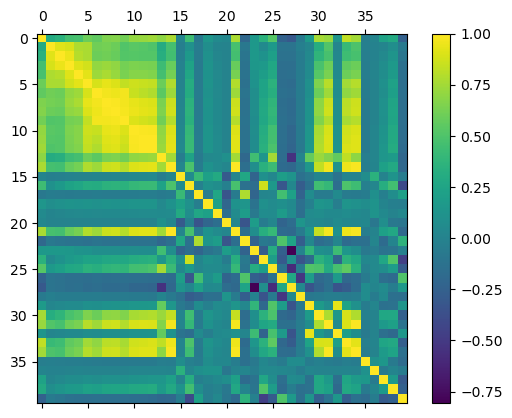

In [29]:
figure = plt.figure()
axes = figure.add_subplot()

corr = axes.matshow(data_imputed.corr())
figure.colorbar(corr)

plt.show()

# Quelle: https://www.geeksforgeeks.org/matplotlib-pyplot-matshow-in-python/

In [30]:
corr = data_imputed.corr()
corr[abs(corr)>=0.7].unstack().dropna().drop_duplicates().sort_values(ascending=False)

Ladestationen      Ladestationen                           1.000000
Anz_Einwohner      Anz_Privathaushalte                     0.998734
EV_Bestand_2020    EV_Bestand_2021                         0.993933
EV_Bestand_2016    EV_Bestand_2017                         0.992690
EV_Bestand_2019    EV_Bestand_2020                         0.991677
                                                             ...   
Ladestationen      EV_Bestand_2019                         0.704687
EV_Bestand_2012    EV_Bestand_2015                         0.704153
EV_Bestand_2017    Beschäftigte_2_Sektor                   0.700300
EV_Bestand_2019    Strassenlänge(km)                       0.700279
Gesamtfläche(km2)  Landwirschaftsfläche_Veränderung(ha)   -0.806543
Length: 123, dtype: float64

Aufgrund hoher Kollinearität zwischen den einzelnen Jahren des Elektroautobestands, werden alle bis auf Ausnahme des letzten Jahres aus dem Dataset entfernt.

In [31]:
EV_history = ['EV_Bestand_2010', 'EV_Bestand_2011', 'EV_Bestand_2012', 'EV_Bestand_2013', 'EV_Bestand_2014', 'EV_Bestand_2015', 'EV_Bestand_2016', 'EV_Bestand_2017', 'EV_Bestand_2018', 'EV_Bestand_2019', 'EV_Bestand_2020']
data_imputed.drop(EV_history, axis=1, inplace=True)


In [32]:
data_imputed.rename({'EV_Bestand_2021':'EV_Bestand'}, inplace=True)

Offenbar korrelieren Beschäftigte & Arbeitsstätten pro Sektor stark. Aus diesem Grund wurden die Arbeitsstätten aus dem Dataset entfernt

In [33]:
Arbeitsstätten = ['Arbeitsstätten_1_Sektor', 'Arbeitsstätten_2_Sektor', 'Arbeitsstätten_3_Sektor']
data_imputed.drop(Arbeitsstätten, axis=1, inplace=True)

Die durchschnittliche Anzahl an Personen pro Aushalt errechnet sich durch die Division von Anz. Einwohner durch Anz. Haushalte. Demnacht kann eine der drei Variabeln wegglassen werden, da sie eine lineare Kombination der anderen ist. Deshalb wurde die Anz. Privathaushalte aus dem Datenset entfernt.

In [34]:
data_imputed.drop('Anz_Privathaushalte', axis=1, inplace=True)

Des Weiteren korriliert die Veränderungen der Siedlungs- & Landwirschaftsflächenveränderung mit diversen anderen Variabeln. Diese werden daher aus dem DataFrame entfernt:

In [35]:
Veränderung_Flächen = ['Landwirschaftsfläche_Veränderung(ha)', 'Siedlungsfläche_Veränderung(ha)']
data_imputed.drop(Veränderung_Flächen, axis=1, inplace=True)

Das gesäuberte DataFrame wird exportiert:

In [36]:
data_imputed.to_csv("cleaned_data.csv")